In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('../../dataset/clustering/clustering.csv')
feature_names = data.columns.tolist()
data

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data normalization (`MinMaxScaler`)

In [3]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns.tolist())
data

,able,ableism,abou,absolutely,abt,abuse,abusive,accept,acceptable,accepting,...,yummy,yup,yur,zero,zille,zionazi,zionazis,zionism,zionist,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# K-means (2 clusters)

In [4]:
kmeans = KMeans(n_clusters=2, n_init='auto', random_state=42)
kmeans.fit(data)

KMeans(n_clusters=2, n_init='auto', random_state=42)

### Ratio of assigned clusters

In [5]:
clusters = kmeans.labels_

print(f'Number of instances in first cluster: {(clusters == 0).sum()}')
print(f'Number of instances in second cluster: {(clusters == 1).sum()}')

Number of instances in first cluster: 47172
Number of instances in second cluster: 154


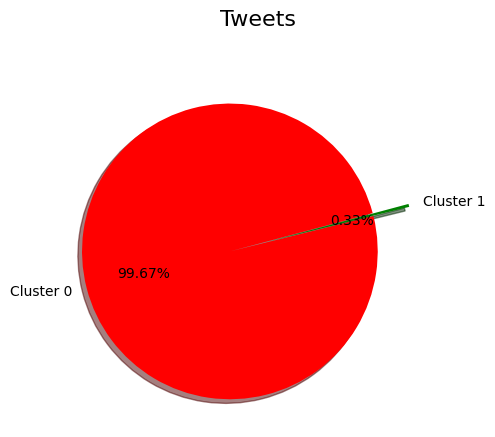

In [6]:
labels = ['Cluster 0', 'Cluster 1']

fig, ax = plt.subplots()
fig.suptitle(t='Tweets', fontsize=16)

ax.pie(
    x=[(clusters == 0).sum(), (clusters == 1).sum()],
    explode=(0.25, 0),
    labels=labels,
    colors=['Red', 'Green'],
    autopct='%.2f%%',
    shadow=True,
    startangle=15
);

## Visualization

In [7]:
def plot_clusters_2d(data: pd.DataFrame) -> None:
    clusters_plt = sns.scatterplot(
        data=data, 
        x='x', 
        y='y', 
        hue='cluster', 
        palette=['green', 'red']
    )

    clusters_plt.set(xlabel=None);
    clusters_plt.set(ylabel=None);

In [8]:
def plot_clusters_3d(data: pd.DataFrame) -> None:
    fig = plt.figure(figsize=(7,7))
    
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(
        data['x'],
        data['y'],
        data['z'],
        marker='o',
        c=data['cluster'],
        s=20,
        cmap='RdBu'
    )

## PCA (2D)

In [9]:
pca_2d = PCA(n_components=2, random_state=42)
pca_2d_vals = pca_2d.fit_transform(data.values)

In [10]:
pca_2d_df = pd.DataFrame(pca_2d_vals, columns=['x', 'y'])
pca_2d_df['cluster'] = clusters
pca_2d_df

,x,y,cluster
0,-0.013147,-0.013254,0
1,-0.007348,-0.032045,0
2,-0.011843,-0.011783,0
3,-0.013819,-0.015786,0
4,-0.011362,-0.009681,0
...,...,...,...
47321,-0.009633,-0.005087,0
47322,-0.011010,-0.004841,0
47323,-0.010511,-0.008236,0
47324,-0.013864,0.011118,0


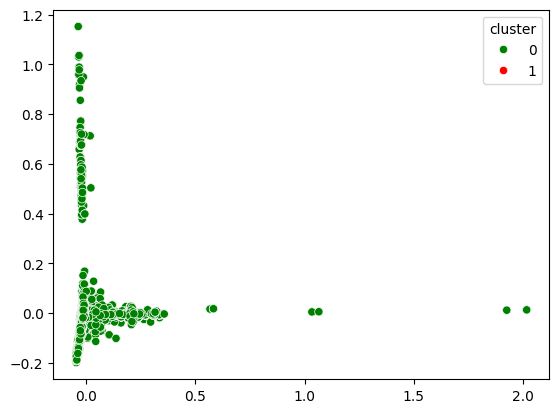

In [11]:
plot_clusters_2d(pca_2d_df)

## PCA (3D)

In [12]:
pca_3d = PCA(n_components=3, random_state=42)
pca_3d_vals = pca_3d.fit_transform(data.values)

In [13]:
pca_3d_df = pd.DataFrame(pca_3d_vals, columns=['x', 'y', 'z'])
pca_3d_df['cluster'] = clusters
pca_3d_df

,x,y,z,cluster
0,-0.013156,-0.013684,-0.010957,0
1,-0.007373,-0.030783,0.012306,0
2,-0.011831,-0.011653,-0.001471,0
3,-0.013777,-0.015776,-0.028056,0
4,-0.011364,-0.009775,-0.007409,0
...,...,...,...,...
47321,-0.009633,-0.005401,-0.017186,0
47322,-0.011011,-0.004888,-0.015841,0
47323,-0.010501,-0.008255,-0.006062,0
47324,-0.013854,0.010897,-0.027472,0


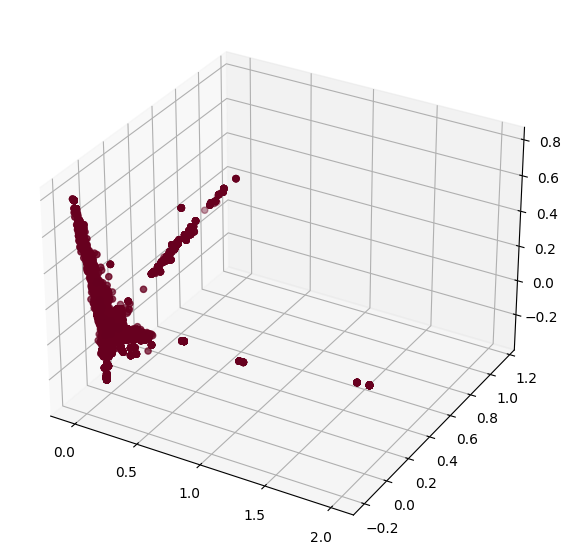

In [14]:
plot_clusters_3d(pca_3d_df)

TruncatedSVD can be used to reduce dimension when it comes to text processing (it works with data from the TF-IDF matrix returned by TfidfVectorizer)

## TruncatedSVD (2D)

In [15]:
tsvd_2d = TruncatedSVD(n_components=2, random_state=42)
tsvd_2d_vals = tsvd_2d.fit_transform(data.values)

In [16]:
tsvd_2d_df = pd.DataFrame(tsvd_2d_vals, columns=['x', 'y'])
tsvd_2d_df['cluster'] = clusters
tsvd_2d_df

,x,y,cluster
0,0.006638,0.047846,0
1,0.022881,0.099697,0
2,0.001880,0.024870,0
3,0.004545,0.043945,0
4,0.002032,0.021709,0
...,...,...,...
47321,0.004935,0.024306,0
47322,0.003211,0.025902,0
47323,0.001149,0.014309,0
47324,0.007287,0.057605,0


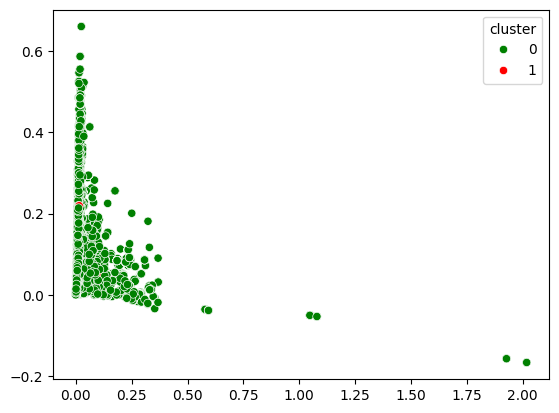

In [17]:
plot_clusters_2d(tsvd_2d_df)

## TruncatedSVD (3D)

In [18]:
tsvd_3d = TruncatedSVD(n_components=3, random_state=42)
tsvd_3d_vals = tsvd_3d.fit_transform(data.values)

In [19]:
tsvd_3d_df = pd.DataFrame(tsvd_3d_vals, columns=['x', 'y', 'z'])
tsvd_3d_df['cluster'] = clusters
tsvd_3d_df

,x,y,z,cluster
0,0.006611,0.049387,-0.024022,0
1,0.023085,0.109262,-0.061538,0
2,0.001918,0.026534,-0.016616,0
3,0.004594,0.045300,-0.024703,0
4,0.002020,0.022591,-0.012910,0
...,...,...,...,...
47321,0.004928,0.024682,-0.007812,0
47322,0.003194,0.026662,-0.008335,0
47323,0.001169,0.015062,-0.009404,0
47324,0.007294,0.057866,0.001140,0


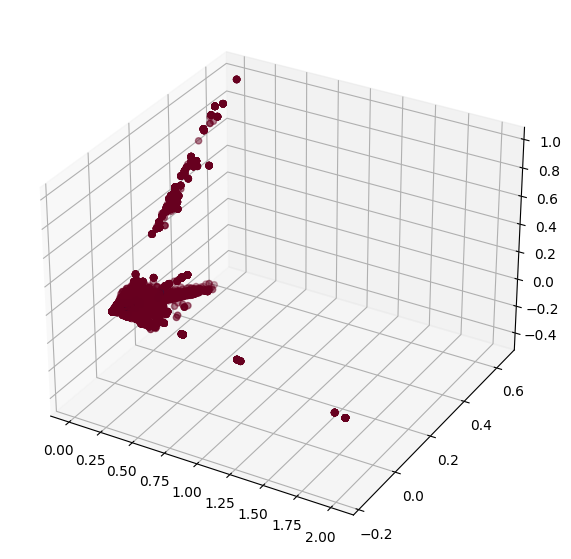

In [20]:
plot_clusters_3d(tsvd_3d_df)

## PCA vs TruncatedSVD

#### 2D

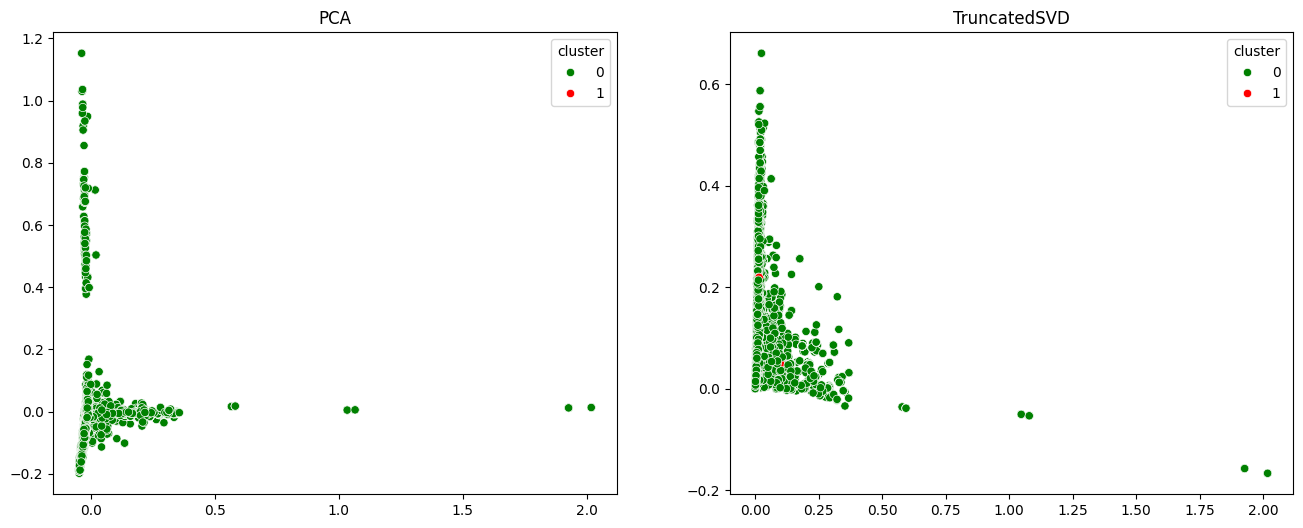

In [21]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('PCA')
ax1_sns = sns.scatterplot(
    data=pca_2d_df,
    x='x', 
    y='y', 
    hue='cluster', 
    palette=['green', 'red'], 
    ax=ax1
);
ax1_sns.set(xlabel=None);
ax1_sns.set(ylabel=None);

ax2.set_title('TruncatedSVD')
ax2_sns = sns.scatterplot(
    data=tsvd_2d_df, 
    x='x', 
    y='y', 
    hue='cluster',
    palette=['green', 'red'],
    ax=ax2
);
ax2_sns.set(xlabel=None);
ax2_sns.set(ylabel=None);

#### 3D

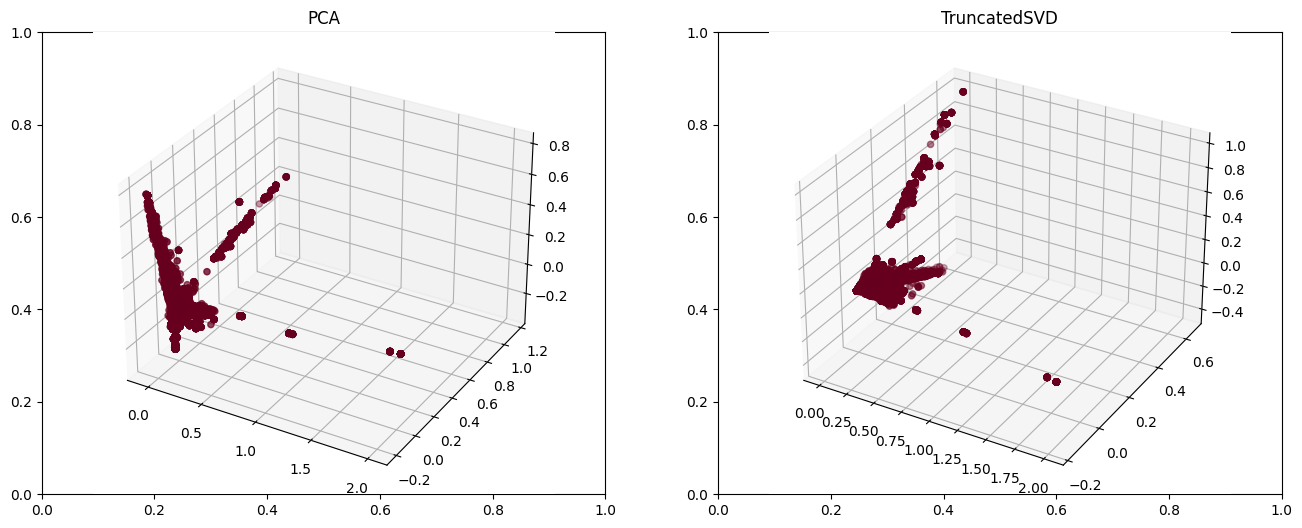

In [22]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('PCA')
ax11 = fig.add_subplot(1, 2, 1, projection='3d')
ax11.scatter(
    pca_3d_df['x'],
    pca_3d_df['y'],
    pca_3d_df['z'],
    marker='o',
    c=pca_3d_df['cluster'],
    s=20,
    cmap='RdBu'
);

ax2.set_title('TruncatedSVD')
ax22 = fig.add_subplot(1, 2, 2, projection='3d')
ax22.scatter(
    tsvd_3d_df['x'],
    tsvd_3d_df['y'],
    tsvd_3d_df['z'],
    marker='o',
    c=tsvd_3d_df['cluster'],
    s=20,
    cmap='RdBu'
);

# Real data

In [23]:
train_data = pd.read_csv('../../dataset/classification/train.csv')
test_data = pd.read_csv('../../dataset/classification/test.csv')

In [24]:
labels = pd.concat([train_data['label'], test_data['label']], axis=0)
labels.index = range(0, labels.shape[0])
labels

0        0
1        0
2        0
3        0
4        0
        ..
47321    0
47322    0
47323    0
47324    0
47325    0
Name: label, Length: 47326, dtype: int64

In [25]:
true_data = tsvd_2d_df.copy()
true_data['cluster'] = labels
true_data

,x,y,cluster
0,0.006638,0.047846,0
1,0.022881,0.099697,0
2,0.001880,0.024870,0
3,0.004545,0.043945,0
4,0.002032,0.021709,0
...,...,...,...
47321,0.004935,0.024306,0
47322,0.003211,0.025902,0
47323,0.001149,0.014309,0
47324,0.007287,0.057605,0


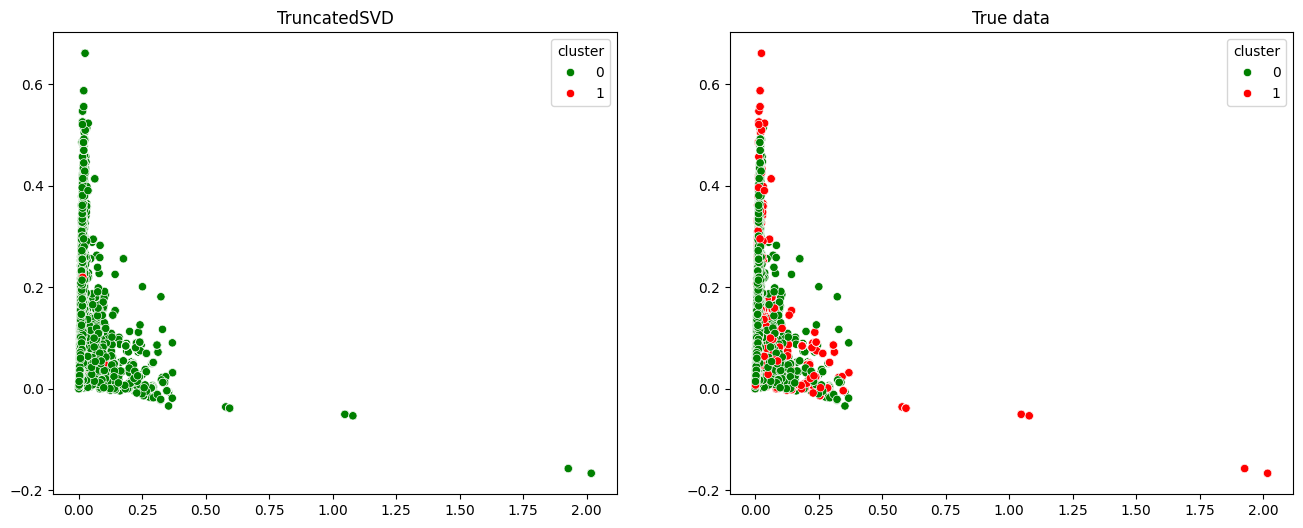

In [26]:
(fig, (ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

ax1.set_title('TruncatedSVD')
ax1_sns = sns.scatterplot(
    data=tsvd_2d_df,
    x='x', 
    y='y', 
    hue='cluster', 
    palette=['green', 'red'], 
    ax=ax1
);
ax1_sns.set(xlabel=None);
ax1_sns.set(ylabel=None);

ax2.set_title('True data')
ax2_sns = sns.scatterplot(
    data=true_data, 
    x='x', 
    y='y', 
    hue='cluster',
    palette=['green', 'red'],
    ax=ax2
);
ax2_sns.set(xlabel=None);
ax2_sns.set(ylabel=None);

## Choosing the best number of clusters

In [27]:
tsvd_choice = TruncatedSVD(n_components=2, random_state=42)
tsvd_choice_data = tsvd_choice.fit_transform(data)

Inertia(k=2): 79,244.8804
Inertia(k=12): 77,229.5287
Inertia(k=22): 76,032.4500
Inertia(k=32): 75,694.9388
Inertia(k=42): 74,131.8663
Inertia(k=52): 73,047.1037
Inertia(k=62): 71,579.9749
Inertia(k=72): 70,663.8227
Inertia(k=82): 71,521.6686
Inertia(k=92): 68,794.0051


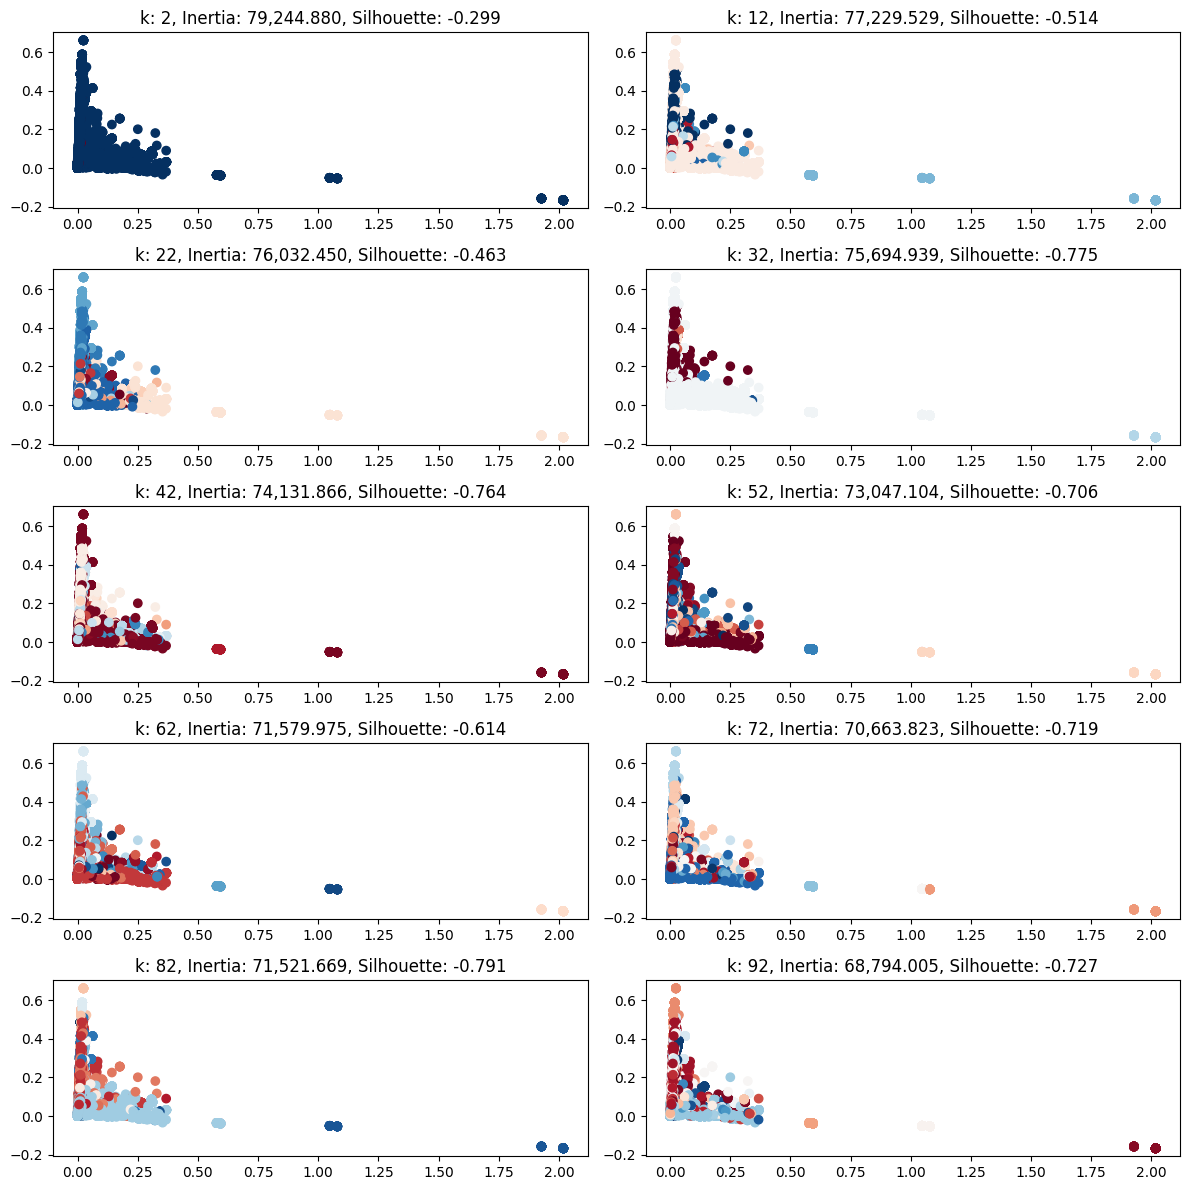

In [28]:
K = np.arange(2, 100, 10)
results = {}

(fig, axs) = plt.subplots(5, 2, figsize=(12, 12))

for (i, k) in enumerate(K):
    row = i // 2
    col = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto')
    Y_kmeans = kmeans.fit_predict(data)

    silhouette = silhouette_score(tsvd_choice_data, kmeans.labels_)
    inertia = kmeans.inertia_
    print(f'Inertia(k={k}): {inertia:,.4f}')

    results[k] = {
        'inertia': inertia,
        'silhouette': silhouette
    }

    ax = axs[row, col]
    ax.scatter(tsvd_choice_data[:, 0], tsvd_choice_data[:, 1], c=Y_kmeans, cmap='RdBu')
    ax.set_title(f'k: {k}, Inertia: {inertia:,.3f}, Silhouette: {silhouette:,.3f}')
    

plt.tight_layout()
plt.show()

In [29]:
ks = list(results.keys())
inertias = [results[key]['inertia'] for key in results]
silhouettes = [results[key]['silhouette'] for key in results]

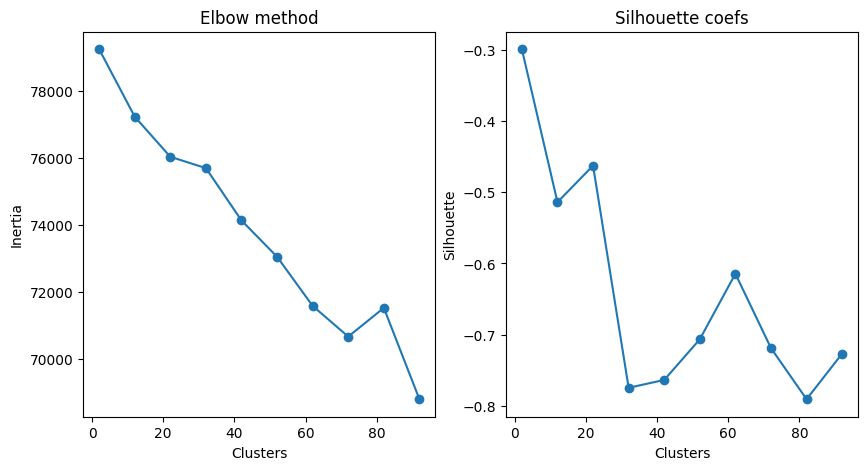

In [30]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertias, marker='o')
plt.ylabel('Inertia')
plt.xlabel('Clusters')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouettes, marker="o")
plt.ylabel('Silhouette')
plt.xlabel('Clusters')
plt.title('Silhouette coefs')

plt.show()

The elbow rule would give us the best model for 62 clusters because the SSE declines the fastest at that number.
However, the Silhouette coefficient tells us that with the increase in the number of clusters, the coherence within the cluster decreases, as well as the separation between clusters, so the best model would be for 2 clusters.

### Saving best model

In [31]:
best_model = KMeans(n_clusters=2, init='k-means++', n_init='auto')
best_model.fit(data)

KMeans(n_clusters=2, n_init='auto')

In [32]:
joblib.dump(best_model, 'k_means.joblib')

['k_means.joblib']